In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\VISHAL\4. covid_19_data.csv')
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


# Cleaning


In [4]:
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

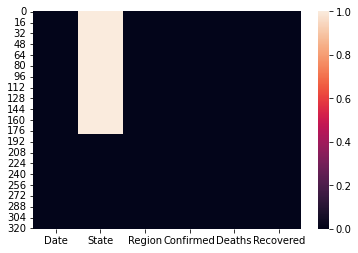

In [5]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.heatmap(data.isnull())
plt.show()

In [6]:
data.dropna(inplace=True)

In [7]:
data.reset_index(inplace = True, drop = True)

In [8]:
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,Alabama,US,6912,256,0
1,4/29/2020,Alaska,US,355,9,0
2,4/29/2020,Alberta,Canada,5165,87,0
3,4/29/2020,Anguilla,UK,3,0,3
4,4/29/2020,Anhui,Mainland China,991,6,985
...,...,...,...,...,...,...
135,4/29/2020,Wyoming,US,545,7,0
136,4/29/2020,Xinjiang,Mainland China,76,3,73
137,4/29/2020,Yukon,Canada,11,0,0
138,4/29/2020,Yunnan,Mainland China,185,2,181


# number of confirmed, deaths and recovered cases in each region

In [9]:
data.groupby('Region').sum()

,Confirmed,Deaths,Recovered
Region,,,
Australia,6752,91,5715
Canada,52865,3155,20327
Denmark,198,0,192
France,1450,34,890
Hong Kong,1037,4,830
Macau,45,0,34
Mainland China,82862,4633,77610
Netherlands,196,16,119
UK,1220,69,857


# number of cases where confirmed is less than 10

In [10]:
data.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,Alabama,US,6912,256,0
1,4/29/2020,Alaska,US,355,9,0


In [11]:
data[data.Confirmed < 10]

,Date,State,Region,Confirmed,Deaths,Recovered
3,4/29/2020,Anguilla,UK,3,0,3
11,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
13,4/29/2020,British Virgin Islands,UK,6,1,3
22,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
91,4/29/2020,Northwest Territories,Canada,5,0,0
103,4/29/2020,Recovered,Canada,0,0,20327
104,4/29/2020,Recovered,US,0,0,120720
107,4/29/2020,Saint Barthelemy,France,6,0,6
108,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
124,4/29/2020,Tibet,Mainland China,1,0,1


# Region in which max number of confirmed cases were recorded

In [12]:
data.groupby('Region').Confirmed.max().sort_values(ascending = False)

Region
US                299691
Mainland China     68128
Canada             26610
Australia           3016
Hong Kong           1037
UK                   537
France               460
Denmark              187
Netherlands          100
Macau                 45
Name: Confirmed, dtype: int64

# region in which min number of death recorded

In [13]:
data.groupby('Region').Deaths.sum().sort_values(ascending = True)

Region
Denmark               0
Macau                 0
Hong Kong             4
Netherlands          16
France               34
UK                   69
Australia            91
Canada             3155
Mainland China     4633
US                60967
Name: Deaths, dtype: int64

# number of death reported from UK till 29 april 2020

In [14]:
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,Alabama,US,6912,256,0
1,4/29/2020,Alaska,US,355,9,0
2,4/29/2020,Alberta,Canada,5165,87,0
3,4/29/2020,Anguilla,UK,3,0,3
4,4/29/2020,Anhui,Mainland China,991,6,985


In [15]:
data[data.Region == 'UK'].Deaths.sum()

69

# Sorting the data w.r.t Recovered cases in descending order

In [16]:
data.sort_values(by = ['Recovered'], ascending = False)

,Date,State,Region,Confirmed,Deaths,Recovered
104,4/29/2020,Recovered,US,0,0,120720
48,4/29/2020,Hubei,Mainland China,68128,4512,63616
103,4/29/2020,Recovered,Canada,0,0,20327
83,4/29/2020,New South Wales,Australia,3016,40,2284
39,4/29/2020,Guangdong,Mainland China,1588,8,1557
...,...,...,...,...,...,...
67,4/29/2020,Maryland,US,20849,1078,0
65,4/29/2020,Manitoba,Canada,275,6,0
64,4/29/2020,Maine,US,1056,52,0
62,4/29/2020,Louisiana,US,27660,1845,0


In [17]:
x=Region.keys()
y=Deaths.values()

NameError: name 'Region' is not defined

In [ ]:
plt.bar(x,y)
plt.xlabel('Region')
plt.ylabel('Deaths')
plt.grid(True)
plt.show